In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as scs
import statsmodels.api as sm
import statsmodels.tsa.api as smt

In [2]:
import seaborn as sns
sns.set_theme(style = 'white', palette = 'pastel')
plt.figure(figsize = (8,6))

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

Data

In [3]:
df_T = pd.read_csv('30mins_data.csv', index_col = "Date")
df_T
df_D = pd.read_csv('daily_data.csv', index_col = "Date")
df_D

,AdjClose,synthetic_daily
Date,,
2021/2/23,245.529999,198.707945
2021/2/24,248.449997,205.128890
2021/2/25,243.690002,205.484121
2021/2/26,240.509995,202.371377
2021/3/1,249.210007,203.311994
...,...,...
2022/2/14,314.279999,202.220479
2022/2/15,316.200012,202.392183
2022/2/16,315.649994,203.806622


In [4]:
#Calculate Log Return
df_T['logReturnTS'] = np.log(df_T['synthetic_30min']/df_T['synthetic_30min'].shift(1))
df_T['logReturnTR'] = np.log(df_T['ThirtyMin']/df_T['ThirtyMin'].shift(1)) 
df_D['logReturnDS'] = np.log(df_D['synthetic_daily']/df_D['synthetic_daily'].shift(1))
df_D['logReturnDR'] = np.log(df_D['AdjClose']/df_D['AdjClose'].shift(1)) 

In [5]:
#Fill in NA with back fill method
df_T['logReturnTS'] = df_T['logReturnTS'].fillna(method = 'bfill')
df_T['logReturnTR'] = df_T['logReturnTR'].fillna(method = 'bfill')
df_D['logReturnDS'] = df_D['logReturnDS'].fillna(method = 'bfill')
df_D['logReturnDR'] = df_D['logReturnDR'].fillna(method = 'bfill')

In [6]:
#Calculate 20-day STD
df_T['MonthlyTS_mstd'] = df_T[['logReturnTS']].rolling(window=20).std()
df_T['MonthlyTR_mstd'] = df_T[['logReturnTR']].rolling(window=20).std()
df_D['MonthlyDS_mstd'] = df_D[['logReturnDS']].rolling(window=20).std()
df_D['MonthlyDR_mstd'] = df_D[['logReturnDR']].rolling(window=20).std()

In [7]:
#Calculate Quarterly STD
df_T['QuarterlyTS_mstd'] = df_T[['logReturnTS']].rolling(window=63).std()
df_T['QuarterlyTR_mstd'] = df_T[['logReturnTR']].rolling(window=63).std()
df_D['QuarterlyDS_mstd'] = df_D[['logReturnDS']].rolling(window=63).std()
df_D['QuarterlyDR_mstd'] = df_D[['logReturnDR']].rolling(window=63).std()

<Figure size 1080x1080 with 0 Axes>

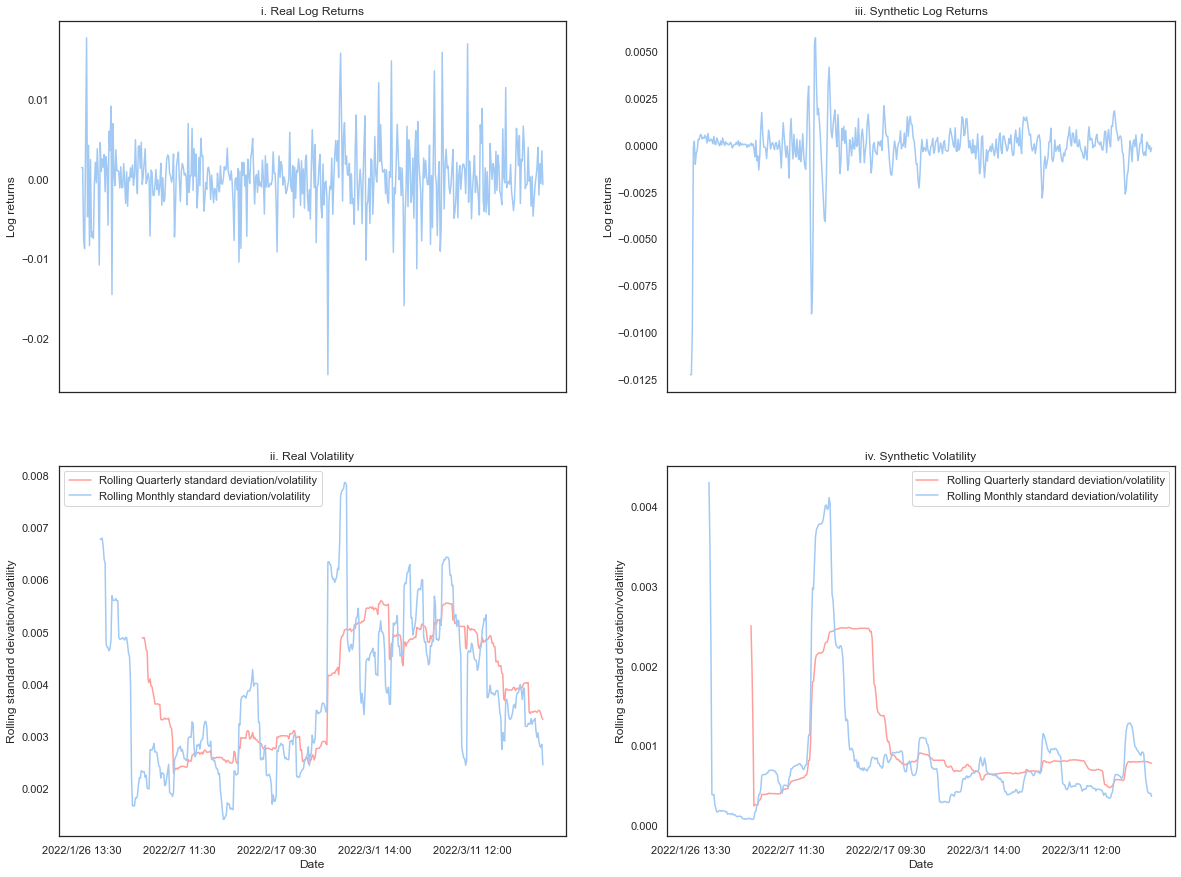

In [11]:
#Plot for ThirtyMin 2*2
sns.set_theme(style = 'white', palette = 'pastel')
plt.figure(figsize = (15,15))
figt, axt, = plt.subplots(2, 2,figsize = (20,15), sharex=True) 
# Subplot 1 - Daily Adj Close trend
#df_T['ThirtyMin'].plot(ax=axt[0,0])
# Setting title and ylabel
#axt[0,0].set(title='Real Adj Close', ylabel='Adjusted Close Price')

# Subplot 1 - Daily log returns
df_T['logReturnTR'].plot(ax=axt[0,0])
# Setting title and ylabel
axt[0,0].set(title='i. Real Log Returns', ylabel='Log returns')

# Subplot 2 - 21 days and 252 days windows to calculate rolling standard deviations
df_T['QuarterlyTR_mstd'].plot(ax=axt[1,0], color='r', label='Rolling Quarterly standard deviation/volatility')
df_T['MonthlyTR_mstd'].plot(ax=axt[1,0], color='b', label='Rolling Monthly standard deviation/volatility')
axt[1,0].set(title='ii. Real Volatility',ylabel='Rolling standard deivation/volatility', xlabel='Date')
axt[1,0].legend()

#Plot for Syn T
#fig1T, ax1T = plt.subplots(3, 1, figsize=(20, 15), sharex=True) 
# Subplot 1 - Daily Adj Close trend
#df_T['synthetic_30min'].plot(ax=axt[0,1])
# Setting title and ylabel
#axt[0,1].set(title='Synthetic Adj Close', ylabel='Adjusted Close Price')

# Subplot 1 - Daily log returns
df_T['logReturnTS'].plot(ax=axt[0,1])
# Setting title and ylabel
axt[0,1].set(title='iii. Synthetic Log Returns', ylabel='Log returns')

# Subplot 2 - 21 days and 252 days windows to calculate rolling standard deviations
df_T['QuarterlyTS_mstd'].plot(ax=axt[1,1], color='r', label='Rolling Quarterly standard deviation/volatility')
df_T['MonthlyTS_mstd'].plot(ax=axt[1,1], color='b', label='Rolling Monthly standard deviation/volatility')
axt[1,1].set(title='iv. Synthetic Volatility', ylabel='Rolling standard deivation/volatility', xlabel='Date')
axt[1,1].legend()



[Text(0.5, 1.0, 'Synthetic Log Returns'), Text(0, 0.5, 'Log returns')]

<Figure size 1080x1080 with 0 Axes>

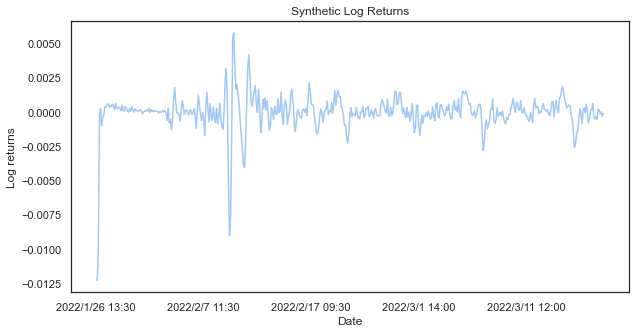

In [28]:
sns.set_theme(style = 'white', palette = 'pastel')
plt.figure(figsize = (15,15))
figt, axt, = plt.subplots(1, 1,figsize = (10,5), sharex=True) 
# Subplot 1 - Daily log returns
df_T['logReturnTS'].plot(ax=axt)
# Setting title and ylabel
axt.set(title='Synthetic Log Returns', ylabel='Log returns')

<Figure size 1080x1080 with 0 Axes>

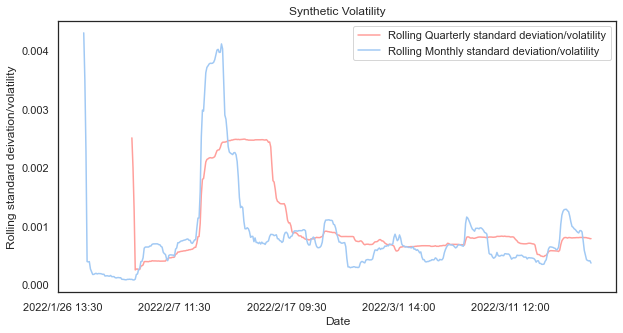

In [29]:
sns.set_theme(style = 'white', palette = 'pastel')
plt.figure(figsize = (15,15))
figt, axt, = plt.subplots(1, 1,figsize = (10,5), sharex=True) 
df_T['QuarterlyTS_mstd'].plot(ax=axt, color='r', label='Rolling Quarterly standard deviation/volatility')
df_T['MonthlyTS_mstd'].plot(ax=axt, color='b', label='Rolling Monthly standard deviation/volatility')
axt.set(title='Synthetic Volatility', ylabel='Rolling standard deivation/volatility', xlabel='Date')
axt.legend()

<Figure size 1080x1080 with 0 Axes>

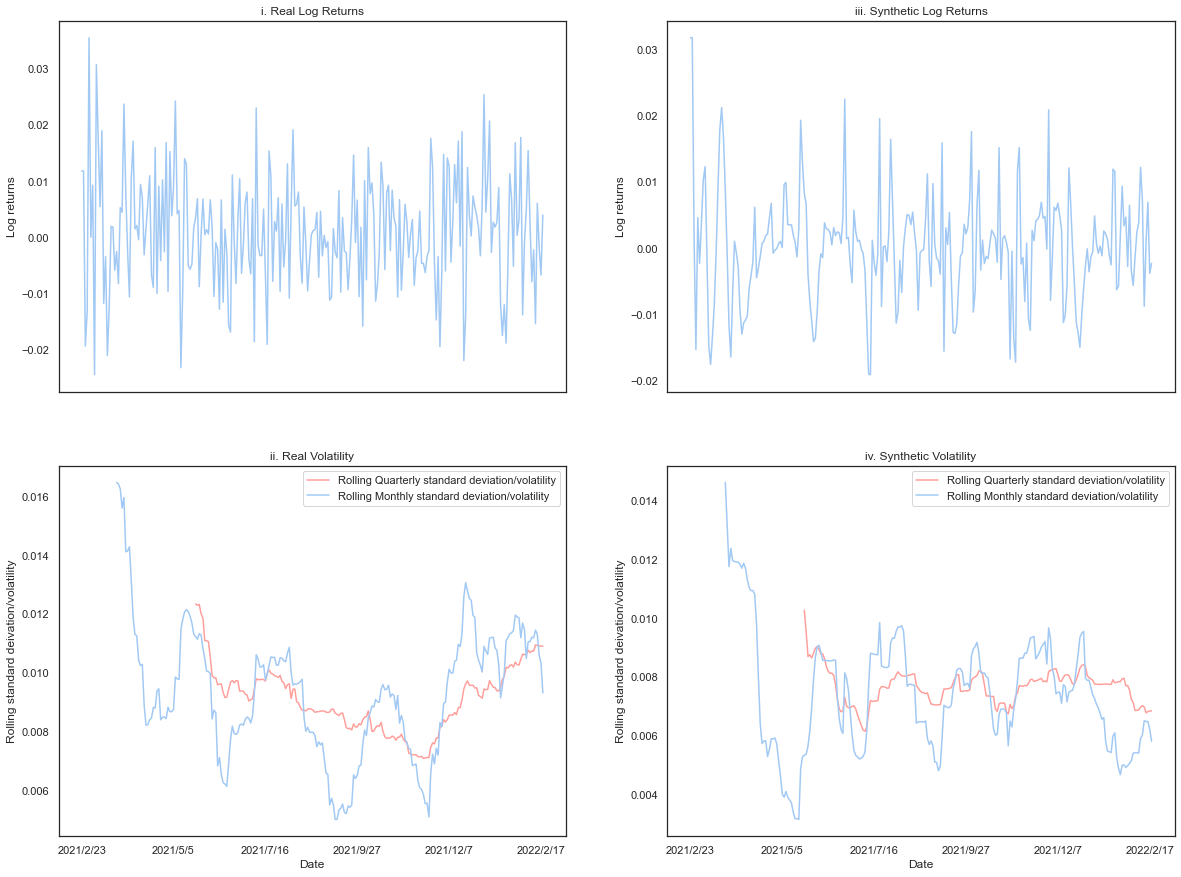

In [12]:
#Plot for Daily 2*2
sns.set_theme(style = 'white', palette = 'pastel')
plt.figure(figsize = (15,15))
figd, axd, = plt.subplots(2, 2,figsize = (20,15), sharex=True) 
# Subplot 1 - Daily Adj Close trend
#df_D['AdjClose'].plot(ax=axd[0,0])
# Setting title and ylabel
#axd[0,0].set(title='Real Adj Close', ylabel='Adjusted Close Price')

# Subplot 1 - Daily log returns
df_D['logReturnDR'].plot(ax=axd[0,0])
# Setting title and ylabel
axd[0,0].set(title='i. Real Log Returns', ylabel='Log returns')

# Subplot 2 - 21 days and 252 days windows to calculate rolling standard deviations
df_D['QuarterlyDR_mstd'].plot(ax=axd[1,0], color='r', label='Rolling Quarterly standard deviation/volatility')
df_D['MonthlyDR_mstd'].plot(ax=axd[1,0], color='b', label='Rolling Monthly standard deviation/volatility')
axd[1,0].set(title='ii. Real Volatility', ylabel='Rolling standard deivation/volatility', xlabel='Date')
axd[1,0].legend()

#Plot for Syn T
#fig1T, ax1T = plt.subplots(3, 1, figsize=(20, 15), sharex=True) 
# Subplot 1 - Daily Adj Close trend
#df_D['synthetic_daily'].plot(ax=axd[0,1])
# Setting title and ylabel
#axd[0,1].set(title='Synthetic Adj Close', ylabel='Adjusted Close Price')

# Subplot 2 - Daily log returns
df_D['logReturnDS'].plot(ax=axd[0,1])
# Setting title and ylabel
axd[0,1].set(title='iii. Synthetic Log Returns', ylabel='Log returns')

# Subplot 3 - 21 days and 252 days windows to calculate rolling standard deviations
df_D['QuarterlyDS_mstd'].plot(ax=axd[1,1], color='r', label='Rolling Quarterly standard deviation/volatility')
df_D['MonthlyDS_mstd'].plot(ax=axd[1,1], color='b', label='Rolling Monthly standard deviation/volatility')
axd[1,1].set(title='iv. Synthetic Volatility',ylabel='Rolling standard deivation/volatility', xlabel='Date')
axd[1,1].legend()


[Text(0.5, 1.0, 'Synthetic Log Returns'), Text(0, 0.5, 'Log returns')]

<Figure size 1080x1080 with 0 Axes>

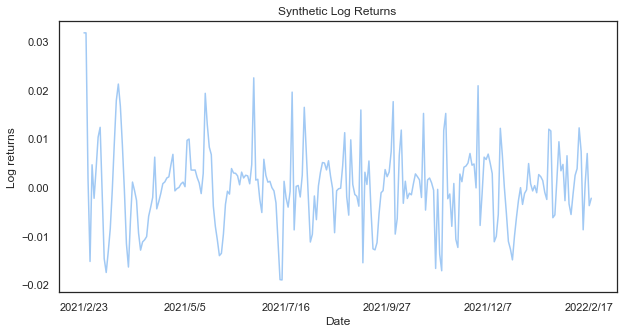

In [30]:
sns.set_theme(style = 'white', palette = 'pastel')
plt.figure(figsize = (15,15))
figd, axd, = plt.subplots(1, 1,figsize = (10,5), sharex=True) 
df_D['logReturnDS'].plot(ax=axd)
# Setting title and ylabel
axd.set(title='Synthetic Log Returns', ylabel='Log returns')

<Figure size 1080x1080 with 0 Axes>

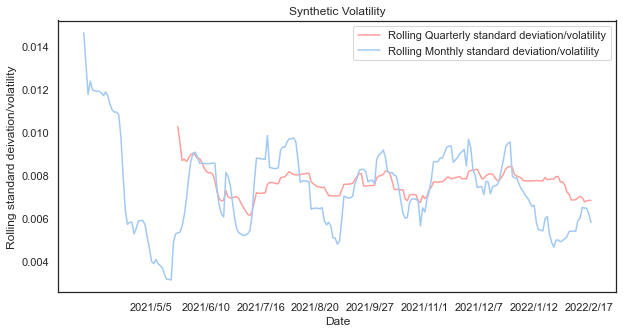

In [31]:
sns.set_theme(style = 'white', palette = 'pastel')
plt.figure(figsize = (15,15))
figd, axd, = plt.subplots(1, 1,figsize = (10,5), sharex=True) 
df_D['QuarterlyDS_mstd'].plot(ax=axd, color='r', label='Rolling Quarterly standard deviation/volatility')
df_D['MonthlyDS_mstd'].plot(ax=axd, color='b', label='Rolling Monthly standard deviation/volatility')
axd.set(title='Synthetic Volatility',ylabel='Rolling standard deivation/volatility', xlabel='Date')
axd.legend()

Text(0.5, 0.98, 'Thirty-Min Frequency')

<Figure size 1440x1080 with 0 Axes>

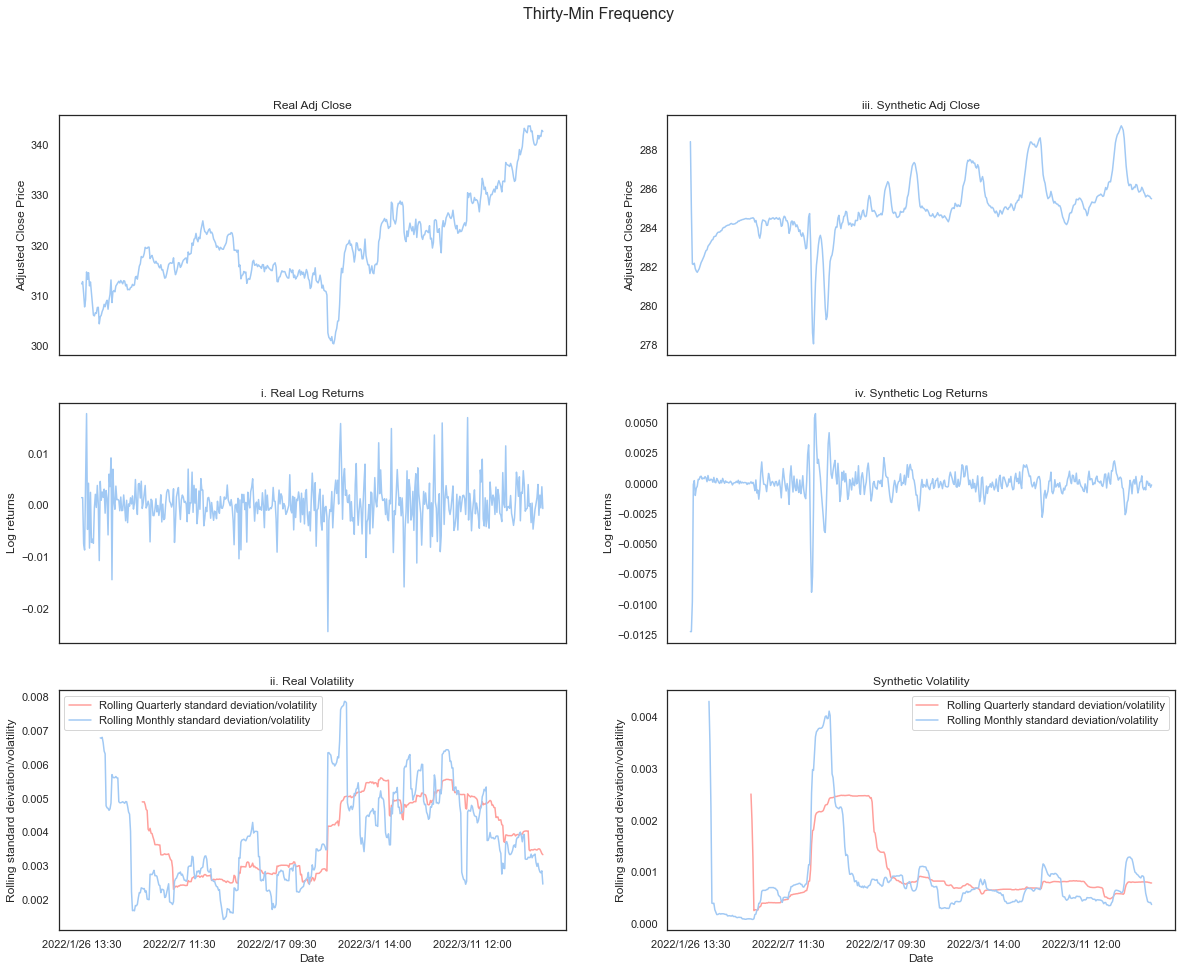

In [13]:
#Plot for ThirtyMin 3*2
sns.set_theme(style = 'white', palette = 'pastel')
plt.figure(figsize = (20,15))
figt, axt, = plt.subplots(3, 2,figsize = (20,15), sharex=True) 
# Subplot 1 - Daily Adj Close trend
df_T['ThirtyMin'].plot(ax=axt[0,0])
# Setting title and ylabel
axt[0,0].set(title='Real Adj Close', ylabel='Adjusted Close Price')

# Subplot 2 - Daily log returns
df_T['logReturnTR'].plot(ax=axt[1,0])
# Setting title and ylabel
axt[1,0].set(title='Real Log Returns', ylabel='Log returns')

# Subplot 3 - 21 days and 252 days windows to calculate rolling standard deviations
df_T['QuarterlyTR_mstd'].plot(ax=axt[2,0], color='r', label='Rolling Quarterly standard deviation/volatility')
df_T['MonthlyTR_mstd'].plot(ax=axt[2,0], color='b', label='Rolling Monthly standard deviation/volatility')
axt[2,0].set(title='Real Volatility',ylabel='Rolling standard deivation/volatility', xlabel='Date')
axt[2,0].legend()

#Plot for Syn T
#fig1T, ax1T = plt.subplots(3, 1, figsize=(20, 15), sharex=True) 
# Subplot 1 - Daily Adj Close trend
df_T['synthetic_30min'].plot(ax=axt[0,1])
# Setting title and ylabel
axt[0,1].set(title='Synthetic Adj Close', ylabel='Adjusted Close Price')

# Subplot 2 - Daily log returns
df_T['logReturnTS'].plot(ax=axt[1,1])
# Setting title and ylabel
axt[1,1].set(title='Synthetic Log Returns', ylabel='Log returns')

# Subplot 3 - 21 days and 252 days windows to calculate rolling standard deviations
df_T['QuarterlyTS_mstd'].plot(ax=axt[2,1], color='r', label='Rolling Quarterly standard deviation/volatility')
df_T['MonthlyTS_mstd'].plot(ax=axt[2,1], color='b', label='Rolling Monthly standard deviation/volatility')
axt[2,1].set(title='Synthetic Volatility', ylabel='Rolling standard deivation/volatility', xlabel='Date')
axt[2,1].legend()

figt.suptitle('Thirty-Min Frequency', fontsize=16)


Text(0.5, 0.98, 'Daily Frequency')

<Figure size 1440x1080 with 0 Axes>

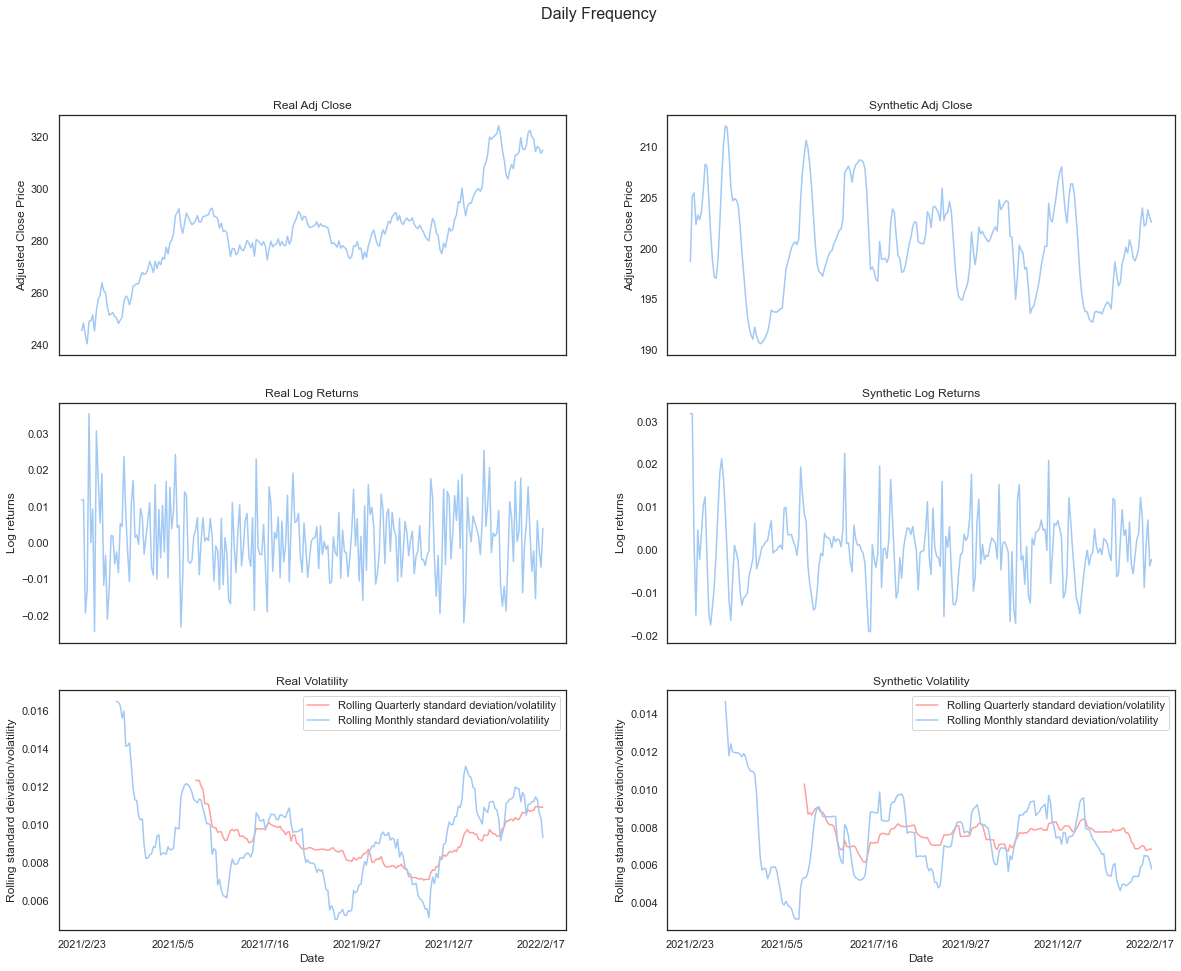

In [14]:
#Plot for Daily 3*2
sns.set_theme(style = 'white', palette = 'pastel')
plt.figure(figsize = (20,15))
figd, axd, = plt.subplots(3, 2,figsize = (20,15), sharex=True) 
# Subplot 1 - Daily Adj Close trend
df_D['AdjClose'].plot(ax=axd[0,0])
# Setting title and ylabel
axd[0,0].set(title='Real Adj Close', ylabel='Adjusted Close Price')

# Subplot 2 - Daily log returns
df_D['logReturnDR'].plot(ax=axd[1,0])
# Setting title and ylabel
axd[1,0].set(title='Real Log Returns', ylabel='Log returns')

# Subplot 3 - 21 days and 252 days windows to calculate rolling standard deviations
df_D['QuarterlyDR_mstd'].plot(ax=axd[2,0], color='r', label='Rolling Quarterly standard deviation/volatility')
df_D['MonthlyDR_mstd'].plot(ax=axd[2,0], color='b', label='Rolling Monthly standard deviation/volatility')
axd[2,0].set(title='Real Volatility', ylabel='Rolling standard deivation/volatility', xlabel='Date')
axd[2,0].legend()

#Plot for Syn T
#fig1T, ax1T = plt.subplots(3, 1, figsize=(20, 15), sharex=True) 
# Subplot 1 - Daily Adj Close trend
df_D['synthetic_daily'].plot(ax=axd[0,1])
# Setting title and ylabel
axd[0,1].set(title='Synthetic Adj Close', ylabel='Adjusted Close Price')

# Subplot 2 - Daily log returns
df_D['logReturnDS'].plot(ax=axd[1,1])
# Setting title and ylabel
axd[1,1].set(title='Synthetic Log Returns', ylabel='Log returns')

# Subplot 3 - 21 days and 252 days windows to calculate rolling standard deviations
df_D['QuarterlyDS_mstd'].plot(ax=axd[2,1], color='r', label='Rolling Quarterly standard deviation/volatility')
df_D['MonthlyDS_mstd'].plot(ax=axd[2,1], color='b', label='Rolling Monthly standard deviation/volatility')
axd[2,1].set(title='Synthetic Volatility',ylabel='Rolling standard deivation/volatility', xlabel='Date')
axd[2,1].legend()

figd.suptitle('Daily Frequency', fontsize=16)

#Plot for Real D
figd, axd = plt.subplots(3, 1, figsize=(20, 15), sharex=True) 
# Subplot 1 - Daily Adj Close trend
df_testD['Daily'].plot(ax=axd[0])
# Setting title and ylabel
axd[0].set(title='Real Adj Close', ylabel='Adjusted Close Price')
# Subplot 2 - Daily log returns
df_testD['logReturnD'].plot(ax=axd[1])
# Setting title and ylabel
axd[1].set(title='Real Log Returns', ylabel='Log returns')

# Subplot 3 - 21 days and 252 days windows to calculate rolling standard deviations
df_testD['QuarterlyD_mstd'].plot(ax=axd[2], color='g', label='Rolling Quarterly standard deviation/volatility')
df_testD['MonthlyD_mstd'].plot(ax=axd[2], color='b', label='Rolling Monthly standard deviation/volatility')
axd[2].set(ylabel='Rolling standard deivation/volatility', xlabel='Date')
axd[2].legend()
figd.suptitle('Daily Frequency for Real Data', fontsize=16)

#Plot for Syn T
fig1T, ax1T = plt.subplots(3, 1, figsize=(20, 15), sharex=True) 
# Subplot 1 - Daily Adj Close trend
df_syn['ThirtyMin'].plot(ax=ax1T[0])
# Setting title and ylabel
ax1T[0].set(title='Synthetic Adj Close', ylabel='Adjusted Close Price')
# Subplot 2 - Daily log returns
df_syn['logReturnT'].plot(ax=ax1T[1])
# Setting title and ylabel
ax1T[1].set(title='Synthetic Log Returns', ylabel='Log returns')

# Subplot 3 - 21 days and 252 days windows to calculate rolling standard deviations
df_syn['QuarterlyT_mstd'].plot(ax=ax1T[2], color='g', label='Rolling Quarterly standard deviation/volatility')
df_syn['MonthlyT_mstd'].plot(ax=ax1T[2], color='b', label='Rolling Monthly standard deviation/volatility')
ax1T[2].set(ylabel='Rolling standard deivation/volatility', xlabel='Date')
ax1T[2].legend()
fig1T.suptitle('Thirty-Min Frequency for Synthetic Data', fontsize=16)

#Plot for Syn D
fig1D, ax1D = plt.subplots(3, 1, figsize=(20, 15), sharex=True) 
# Subplot 1 - Daily Adj Close trend
df_syn['Daily'].plot(ax=ax1D[0])
# Setting title and ylabel
ax1D[0].set(title='Synthetic Adj Close', ylabel='Adjusted Close Price')
# Subplot 2 - Daily log returns
df_syn['logReturnD'].plot(ax=ax1D[1])
# Setting title and ylabel
ax1D[1].set(title='Synthetic Log Returns', ylabel='Log returns')

# Subplot 3 - 21 days and 252 days windows to calculate rolling standard deviations
df_syn['QuarterlyD_mstd'].plot(ax=ax1D[2], color='g', label='Rolling Quarterly standard deviation/volatility')
df_syn['MonthlyD_mstd'].plot(ax=ax1D[2], color='b', label='Rolling Monthly standard deviation/volatility')
ax1D[2].set(ylabel='Rolling standard deivation/volatility', xlabel='Date')
ax1D[2].legend()
fig1D.suptitle('Daily Frequency for Synthetic Data', fontsize=16)